In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Enric\anaconda3\python.exe
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


In [19]:
path = "H:\\Dropbox\\Personale\\Ricerca\\Clustering_Project_with_Notre_Dame\\Datasets\\"
name = "UnsupervisedDataLamb0.4.npy"

In [20]:
array = np.load(path+name)
print(type(array))

<class 'numpy.ndarray'>


In [21]:
# Create the dataframe
df = pd.DataFrame(np.transpose(array))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Columns: 750 entries, 0 to 749
dtypes: float64(750)
memory usage: 131.6 MB


In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.998509,0.054578,0.001000,0.000173,0.000004,3.583409e-07,2.009087e-07,7.239799e-08,1.564827e-08,1.464199e-08,...,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17
1,0.998459,0.053303,0.015237,0.002503,0.000007,2.936841e-06,1.521340e-07,1.299256e-07,6.462215e-08,6.266699e-08,...,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17
2,0.998498,0.054735,0.002339,0.000127,0.000030,1.120211e-06,5.554875e-07,2.983853e-07,2.256081e-07,1.006055e-07,...,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17
3,0.998455,0.053252,0.015663,0.002568,0.000083,9.155879e-06,2.621441e-06,2.147018e-06,1.136417e-06,2.931042e-07,...,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17
4,0.998455,0.053252,0.015670,0.002568,0.000086,9.267410e-06,2.277068e-06,1.192599e-06,3.856189e-07,3.020026e-07,...,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17


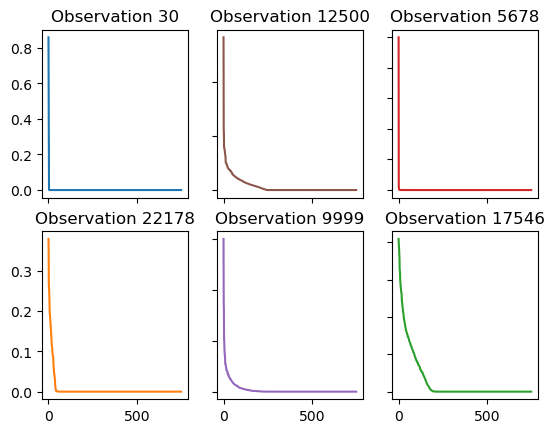

In [24]:
# plotting the points
x = range(0, 750)
y = [30, 12500, 5678, 22178, 9999, 17546]
fig, axs = plt.subplots(2, 3)

axs[0, 0].plot(x, df.iloc[y[0]])
label = 'Observation '+ str(y[0])
axs[0, 0].set_title(label)

axs[0, 1].plot(x, df.iloc[y[1]], 'tab:brown')
label = 'Observation '+ str(y[1])
axs[0, 1].set_title(label)

axs[0, 2].plot(x, df.iloc[y[2]], 'tab:red')
label = 'Observation '+ str(y[2])
axs[0, 2].set_title(label)

axs[1, 0].plot(x, df.iloc[y[3]], 'tab:orange')
label = 'Observation '+ str(y[3])
axs[1, 0].set_title(label)

axs[1, 1].plot(x, df.iloc[y[4]], 'tab:purple')
label = 'Observation '+ str(y[4])
axs[1, 1].set_title(label)

axs[1, 2].plot(x, df.iloc[y[5]], 'tab:green')
label = 'Observation '+ str(y[5])
axs[1, 2].set_title(label)



# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
     ax.label_outer()
        

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df = pd.DataFrame( scaled_array, columns = df.columns )

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [27]:
COMPONENTS = 3

pca = PCA(n_components = COMPONENTS)
x_9d = pca.fit_transform(df)

# Get the explainwed variance
pca.explained_variance_


array([528.88176602, 158.98007761,  30.50257559])

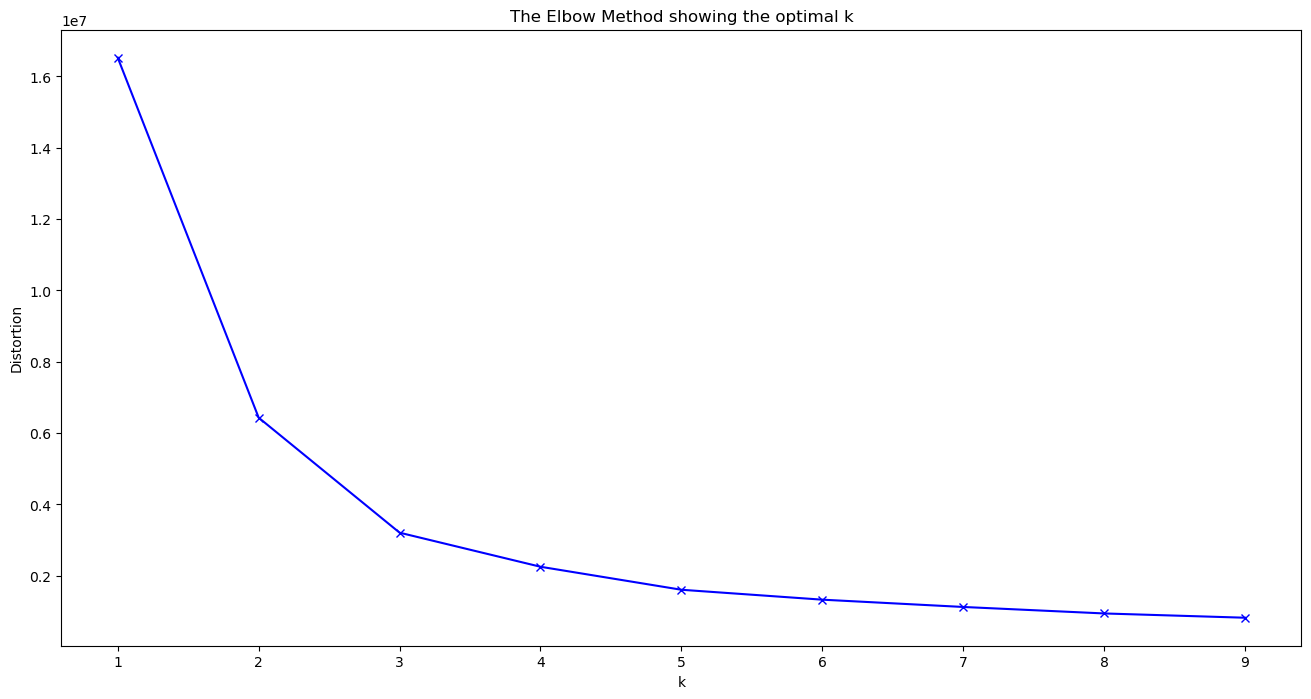

In [28]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_9d)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
def myk_means(CLUSTERS):
    kmeans = KMeans(n_clusters = CLUSTERS)

    X_clustered = kmeans.fit_predict(x_9d)

    # Define our own color map
    LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y',4:'m',5:'c',6:'k', 7 : 'w'}
    label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
    # Plot the scatter digram
    plt.figure(figsize = (7,7))
    plt.scatter(x_9d[:,0],x_9d[:, COMPONENTS - 1], c= label_color, alpha=0.5) 
    plt.show()


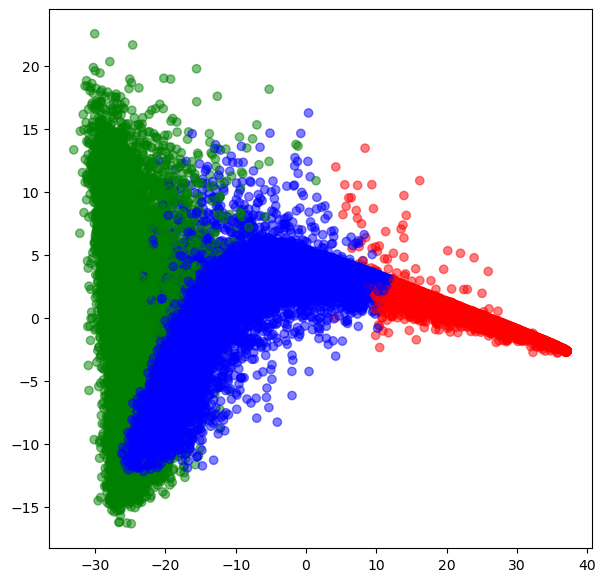

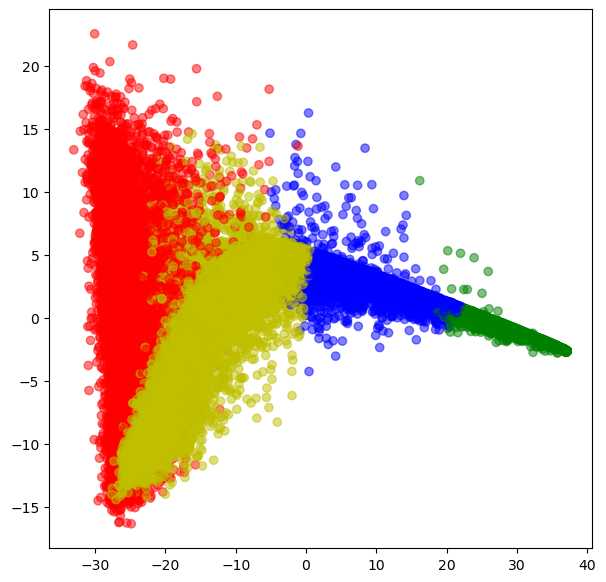

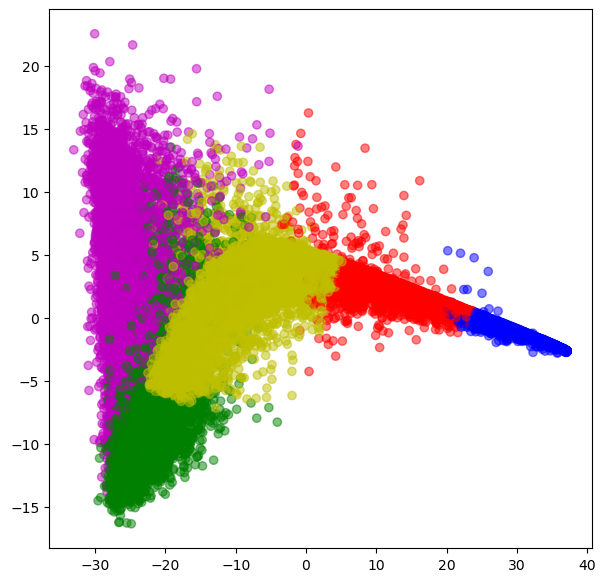

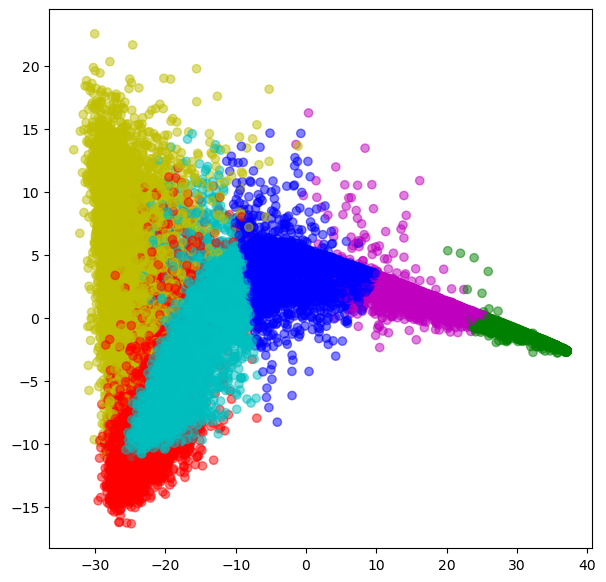

In [30]:
for k in range(3,7):
    myk_means(k)

# DBSCAN

In [31]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs = neighb.fit(x_9d) # fitting the data to the object
distances, indices = nbrs.kneighbors(x_9d) # finding the nearest neighbours

## Epsilon
Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, 
we identify the maximum value at the curvature of the graph. This value is our Eps.

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
If the dataset has two dimensions, use the min sample per cluster as 4.
If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension

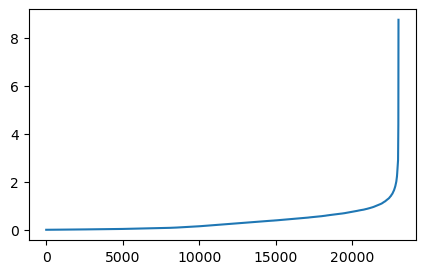

In [32]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [44]:
EPS = 2
MIN_SAMPLES = 2 * COMPONENTS

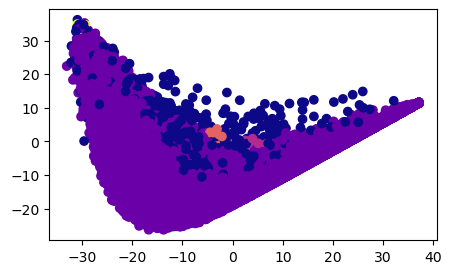

In [45]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = EPS, min_samples = MIN_SAMPLES).fit(x_9d) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(x_9d[:, 0], x_9d[:,1], c = labels, cmap= "plasma") # plotting the clusters
